In [1]:
#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random
import time
random.seed(100)

In [3]:
filepath= r"C:\Users\simra\Desktop\Python_DS_Station\Data Science_Projects\Predicting the likelihood of E-signing a loan based on Financial History\P39-Financial-Data.csv"

dataset= pd.read_csv(filepath)

In [4]:
#EDA

In [5]:
dataset.head(5)

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [6]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [8]:
dataset.describe() #pretty much balanced dataset if we see our response variable

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [9]:
#Data Cleaning

In [10]:
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [11]:
#Plotting histograms
#Before plotting histograms, we need to make sure that columns that we offer to histograms are often plottable
#meaning we dont care about any categorical variables that need to be removed, and any variables with NA has to be removed

In [12]:
dataset2= dataset.drop(columns=['entry_id', 'pay_schedule', 'e_signed'])

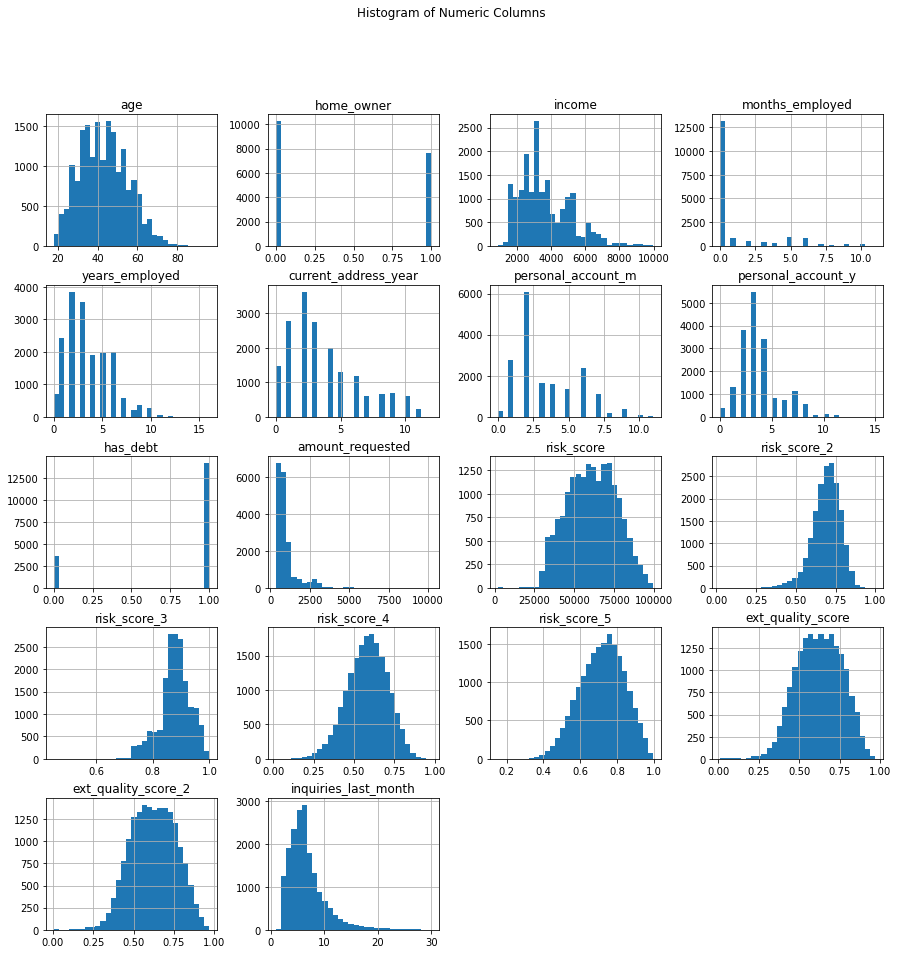

In [13]:
dataset2.hist(bins=30, figsize=(15, 15))
plt.suptitle('Histogram of Numeric Columns')
plt.show()

In [14]:
#months employed seem to be bit off here in the histo gram plot
#Most of the users lay on 0 particular value and few lay over everyehereelse and this is weird as this shoulnt be the case 
#as so many people have even years of employment (1 year employment flat, 2 years, etc) as employment is distributed by years and months

#So, the reason of plotting histogram is to spot such things which dont make any sense (not normalised, if draw a line over the data points)

In [15]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple']

<AxesSubplot:title={'center':'correlation with response variable'}>

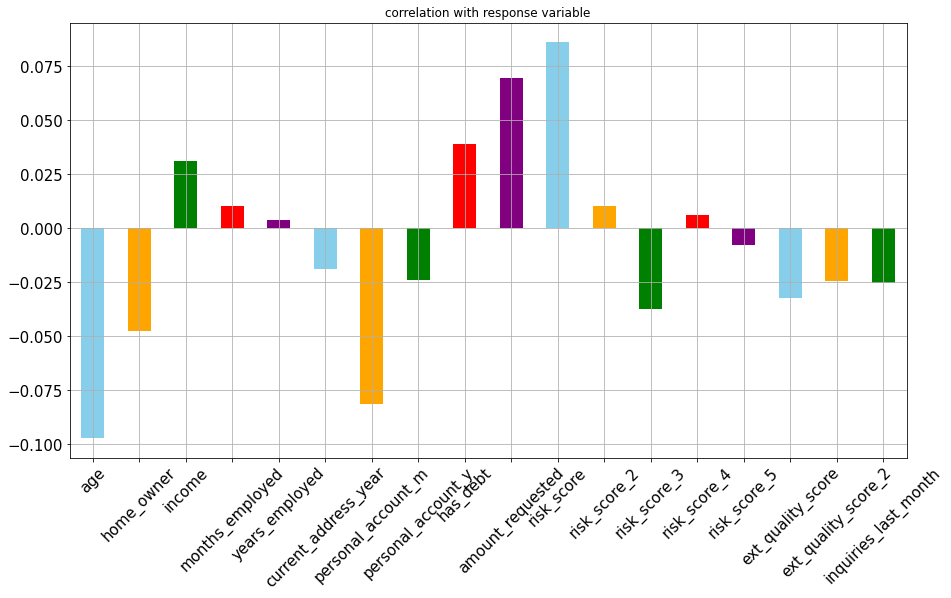

In [16]:
#Correlation with response/ target variable

dataset2.corrwith(dataset.e_signed).plot.bar(figsize=(15,8),title= 'correlation with response variable', fontsize= 15, rot= 45, grid= True, color= colors)

In [17]:
#Reason behing strong correlation we dont know in depth yet but its good to keep these correlations with response variable

In [18]:
#Plotting correlation matrix to see the correlation of features/ relationships of features with each other and understand if we need any feature engineering or not
#If not, it always educational to see the relationship b/w features

In [19]:
dataset2.corr()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
age,1.000000,0.142046,0.174062,-0.103635,0.182590,0.146554,-0.013609,0.041332,-0.043808,0.084132,0.162868,-0.019163,0.111258,0.069191,0.093710,0.032265,0.040019,0.041224
home_owner,0.142046,1.000000,0.147487,0.018008,0.027367,0.179291,0.013782,-0.047105,-0.076206,0.033996,0.113608,0.000647,0.049708,-0.137293,-0.080470,0.010080,0.005507,0.011215
income,0.174062,0.147487,1.000000,-0.049157,0.102139,0.046982,0.009052,-0.002002,-0.011199,0.289099,0.168375,-0.023627,0.058665,-0.001254,0.025179,-0.008429,-0.003323,0.051622
months_employed,-0.103635,0.018008,-0.049157,1.000000,-0.189805,-0.056609,0.211605,-0.019645,-0.000546,-0.044234,-0.044765,0.028950,-0.024297,-0.014512,-0.019406,-0.009041,-0.004461,-0.026710
years_employed,0.182590,0.027367,0.102139,-0.189805,1.000000,0.343905,-0.052543,0.184879,0.005293,0.084841,0.098960,-0.056574,0.074659,-0.029398,0.000234,0.014162,0.030353,0.011976
current_address_year,0.146554,0.179291,0.046982,-0.056609,0.343905,1.000000,0.082491,0.110258,0.017423,0.067893,0.090535,-0.060412,0.058936,-0.161052,-0.094545,0.003362,0.009093,0.013659
personal_account_m,-0.013609,0.013782,0.009052,0.211605,-0.052543,0.082491,1.000000,-0.140649,0.246832,-0.046148,-0.044146,-0.023498,0.029162,-0.060695,-0.033960,-0.016151,-0.009181,-0.028225
personal_account_y,0.041332,-0.047105,-0.002002,-0.019645,0.184879,0.110258,-0.140649,1.000000,-0.030701,0.051857,0.017071,0.027535,0.079175,0.012877,0.042121,0.039808,0.029372,0.003923
has_debt,-0.043808,-0.076206,-0.011199,-0.000546,0.005293,0.017423,0.246832,-0.030701,1.000000,-0.008445,-0.020332,-0.034691,0.001108,0.002074,0.002341,-0.021523,-0.009055,-0.001007
amount_requested,0.084132,0.033996,0.289099,-0.044234,0.084841,0.067893,-0.046148,0.051857,-0.008445,1.000000,0.290716,0.005405,0.045465,0.061459,0.071470,0.025167,0.028052,-0.036197


<AxesSubplot:>

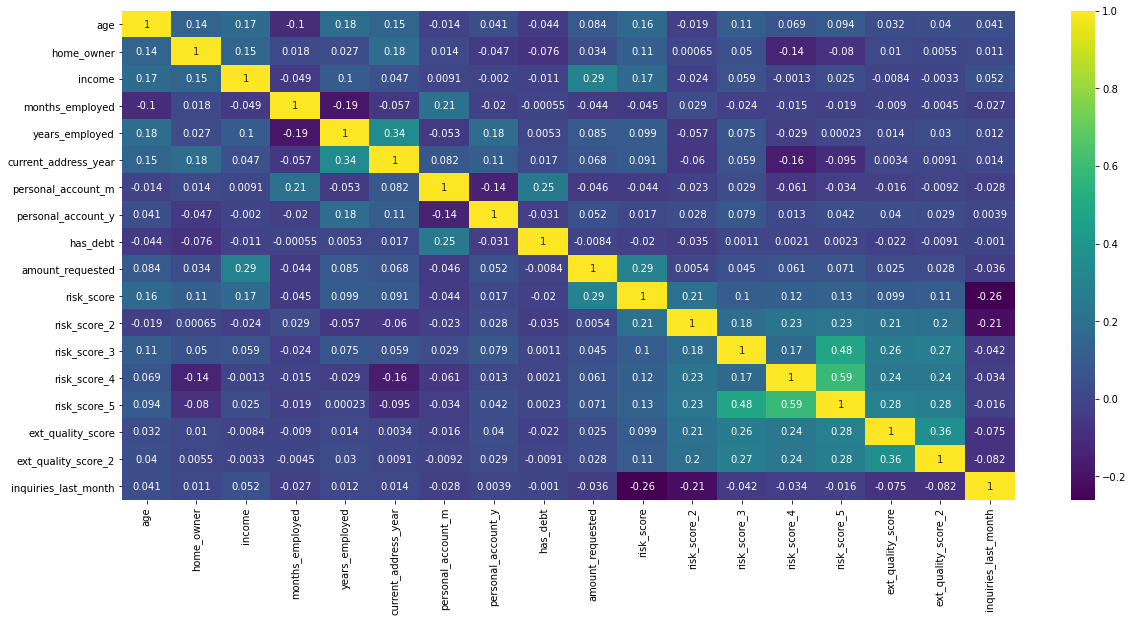

In [20]:
#we need to see whether the features are strongly correlated to each other?
plt.figure(figsize=(20,9))
sns.heatmap(dataset2.corr(), annot=True, cmap='viridis')

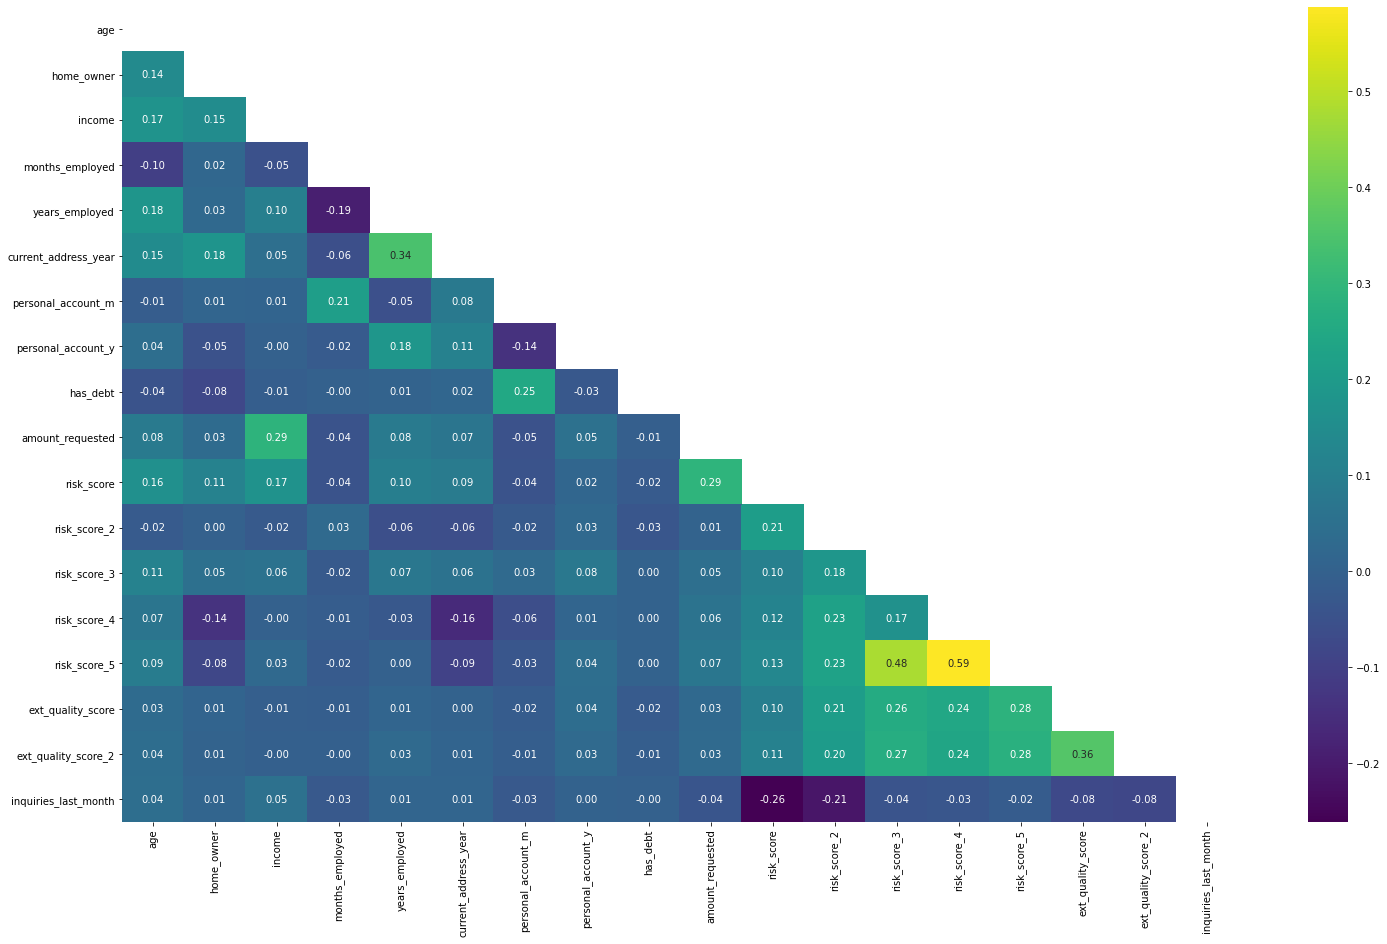

In [21]:
#Visualising the lower triangle of heatmap
corr_matrix = dataset2.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='viridis', fmt=".2f")
plt.show()

In [22]:
#Data Pre-Processing
filepath= r"C:\Users\simra\Desktop\Python_DS_Station\Data Science_Projects\Predicting the likelihood of E-signing a loan based on Financial History\P39-Financial-Data.csv"

dataset= pd.read_csv(filepath)

In [23]:
#Feature Engineering
dataset= dataset.drop(columns=['months_employed'])

In [24]:
dataset['personal_account_months']= (dataset['personal_account_m'] + (dataset['personal_account_y']*12))

In [25]:
dataset[['personal_account_m', 'personal_account_y','personal_account_months']]

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98
...,...,...,...
17903,2,6,74
17904,3,3,39
17905,1,8,97
17906,6,1,18


In [26]:
dataset= dataset.drop(columns=['personal_account_m', 'personal_account_y'])

In [27]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


In [28]:
#One Hot Encoding
dataset= pd.get_dummies(dataset)

In [29]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [30]:
#payschedule was object type and afte using one hot encoding, it got splitted into 4 diff columns.
#we thus need to remove one of them to make linearly independent column.
# Well, this is a choice that you can do.There's no right answer for this.
#I personally going to remove semi-monthly just because semi-monthly is the weirdest of the pay_schedules.And odds are it's going to be the less frequent.So I'm just going to remove that one.

In [31]:
dataset= dataset.drop(columns=['pay_schedule_semi-monthly'])

In [32]:
#removing extra columns
response= dataset['e_signed']
users= dataset['entry_id']
dataset= dataset.drop(columns=['e_signed','entry_id'])

In [33]:
#splitting the dataset into training and testing set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.2,random_state = 0)     

In [35]:
X_train

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
5957,43,0,3295,0,2,1,500,31700,0.584310,0.836281,0.706562,0.689824,0.475014,0.475014,13,54,0,0,1
16854,37,0,3580,4,1,1,400,49500,0.805133,0.911328,0.533152,0.817170,0.628865,0.528865,4,39,0,1,0
4429,34,1,3040,1,1,0,500,38900,0.739929,0.796979,0.572134,0.623745,0.705180,0.505180,11,50,1,0,0
13607,60,1,2700,5,10,1,400,50550,0.633806,0.970787,0.425184,0.593275,0.837044,0.737044,6,100,1,0,0
3750,24,0,2095,6,10,1,600,73050,0.669362,0.860915,0.468355,0.744855,0.638230,0.838230,3,42,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,52,0,3030,5,3,1,600,56500,0.759140,0.878872,0.630102,0.864939,0.456575,0.456575,6,42,0,0,1
13123,29,1,1690,3,2,1,700,54150,0.694791,0.850714,0.631073,0.566799,0.629550,0.829550,5,41,1,0,0
9845,45,0,2960,2,1,1,450,33050,0.654987,0.891217,0.630338,0.744328,0.421326,0.421326,8,12,1,0,0
10799,56,0,2610,9,8,0,2700,47450,0.665292,0.880005,0.716262,0.837618,0.641344,0.741344,4,134,0,0,0


In [36]:
#Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

SC= StandardScaler()
X_train= SC.fit_transform(X_train)
X_test= SC.transform(X_test)

In [38]:
X_train

array([[-0.00599126, -0.85634884, -0.24235846, ..., -1.22463801,
        -0.30236006,  1.97682704],
       [-0.50989022, -0.85634884, -0.05259224, ..., -1.22463801,
         3.30731512, -0.50586115],
       [-0.7618397 ,  1.16774842, -0.41214928, ...,  0.81656783,
        -0.30236006, -0.50586115],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ...,  0.81656783,
        -0.30236006, -0.50586115],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -1.22463801,
        -0.30236006, -0.50586115],
       [-0.7618397 , -0.85634884, -0.36554004, ...,  0.81656783,
        -0.30236006, -0.50586115]])

In [39]:
X_test

array([[-1.01378918, -0.85634884, -0.24235846, ..., -1.22463801,
        -0.30236006, -0.50586115],
       [-1.01378918, -0.85634884, -0.33557695, ...,  0.81656783,
        -0.30236006, -0.50586115],
       [ 0.24595822, -0.85634884, -0.59858627, ..., -1.22463801,
        -0.30236006, -0.50586115],
       ...,
       [-0.08997442, -0.85634884, -0.41214928, ...,  0.81656783,
        -0.30236006, -0.50586115],
       [-0.25794074, -0.85634884, -0.25567539, ...,  0.81656783,
        -0.30236006, -0.50586115],
       [-0.08997442, -0.85634884, -0.72176785, ..., -1.22463801,
        -0.30236006,  1.97682704]])

In [40]:
#Model Building
#Comparing Models

In [41]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=  LogisticRegression(random_state=0, solver='saga', penalty='l1')
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='saga')

In [42]:
predictions = model.predict(X_test)

In [43]:
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

<AxesSubplot:>

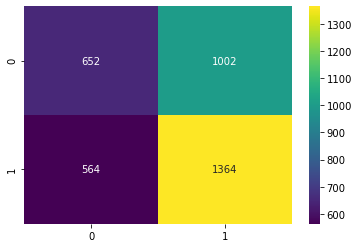

In [44]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, predictions)
cm
sns.heatmap(cm, annot= True, cmap='viridis',annot_kws={"size": 10},fmt="d")

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.39      0.45      1654
           1       0.58      0.71      0.64      1928

    accuracy                           0.56      3582
   macro avg       0.56      0.55      0.54      3582
weighted avg       0.56      0.56      0.55      3582



In [46]:
acc= accuracy_score(y_test, predictions) #Not high at all
acc

0.5628140703517588

In [47]:
pre= precision_score(y_test, predictions) #something there not too high
pre  #TP/TP+FP -> out of all predicted positives, we want to know how many have been predicted right?And how many have been predicted wrong.

0.5765004226542688

In [48]:
rec= recall_score(y_test, predictions) #there is bias in model
rec #TP/TP+FN ->that tells us out of all the actual positives,how many did we predict to be actually true?So the recall is telling us that out of all the actual positives, we have predicted them to be true around 70% of the time, which is good.

0.7074688796680498

In [49]:
f1= f1_score(y_test, predictions)
f1

0.6353050768514206

In [50]:
#SVM (Linear)

In [51]:
from sklearn.svm import SVC
model=  SVC(random_state=0, kernel= 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [52]:
predictions = model.predict(X_test)

<AxesSubplot:>

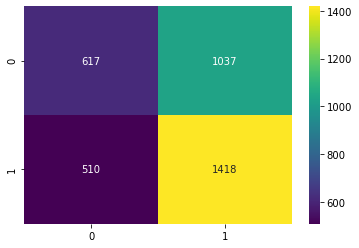

In [53]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, predictions)
cm
sns.heatmap(cm, annot= True, cmap='viridis',annot_kws={"size": 10},fmt="d")

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.37      0.44      1654
           1       0.58      0.74      0.65      1928

    accuracy                           0.57      3582
   macro avg       0.56      0.55      0.55      3582
weighted avg       0.56      0.57      0.55      3582



In [55]:
acc= accuracy_score(y_test, predictions) 
acc

0.5681183696259073

In [56]:
pre= precision_score(y_test, predictions) 
pre

0.5775967413441955

In [57]:
rec= recall_score(y_test, predictions) 
rec

0.7354771784232366

In [58]:
f1= f1_score(y_test, predictions)
f1

0.6470454026922199

<AxesSubplot:>

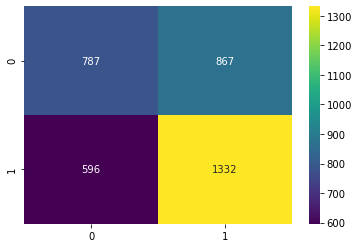

In [59]:
from sklearn.svm import SVC
model=  SVC(random_state=0, kernel= 'rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, predictions)
cm
sns.heatmap(cm, annot= True, cmap='viridis',annot_kws={"size": 10},fmt="d")

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.48      0.52      1654
           1       0.61      0.69      0.65      1928

    accuracy                           0.59      3582
   macro avg       0.59      0.58      0.58      3582
weighted avg       0.59      0.59      0.59      3582



In [61]:
acc= accuracy_score(y_test, predictions) 
acc

0.5915689558905639

In [62]:
pre= precision_score(y_test, predictions) 
pre


0.6057298772169167

In [63]:
rec= recall_score(y_test, predictions) 
rec


0.6908713692946058

In [64]:
f1= f1_score(y_test, predictions)
f1

0.6455052095953476

<AxesSubplot:>

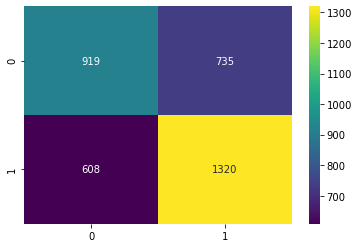

In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier=  RandomForestClassifier(random_state=0, n_estimators= 100)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, predictions)
cm
sns.heatmap(cm, annot= True, cmap='viridis',annot_kws={"size": 10},fmt="d")

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1654
           1       0.64      0.68      0.66      1928

    accuracy                           0.63      3582
   macro avg       0.62      0.62      0.62      3582
weighted avg       0.62      0.63      0.62      3582



In [67]:
acc= accuracy_score(y_test, predictions) 
acc

0.6250697934115019

In [68]:
pre= precision_score(y_test, predictions) 
pre

0.6423357664233577

In [69]:
rec= recall_score(y_test, predictions) 
rec

0.6846473029045643

In [70]:
f1= f1_score(y_test, predictions)
f1

0.6628169721315592

In [71]:
#Random Forest is the best performer

#To validate this model,to see if it performs like it says it does
#So, to do that we are going to apply k-fold cross validation

In [72]:
#So if we do K-fold cross validation, we are guaranteeing that this model is well
#we're almost guaranteeing that this model is consistent throughout all of the data that exists in the training set
#So this is good, then we can finally guarantee that random forest is the best option we have to run here

In [75]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= classifier, X= X_train, y= y_train, cv=10) #10 fold cross validations

In [76]:
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.628 (+/- 0.021)


In [77]:
#Now we are going to fine tune this Random Forest model and will do parameter tuning 
#and what its going to accomplish is to find best parameters to Random Forest that gives us the most accuracy in our model

In [79]:
#Applying Grid Search for Parameter Tuning

#Round 1: Entropy
parameters= {'criterion':['entropy'],'max_depth':[3,None],'max_features':[1,5,10],'min_samples_split':[2,5,10], 'min_samples_leaf':[1,5,10], 'bootstrap':[True, False]}

In [80]:
#Implementing on training set: classifier
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(estimator= classifier, param_grid= parameters, scoring= "accuracy", cv=10, n_jobs=-1)

In [81]:
grid_search= grid_search.fit(X_train, y_train)

In [83]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

rf_best_accuracy, rf_best_parameters

(0.6345122647725013,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [88]:
#Round 2: Entropy 
#As we got the best set of param results, would like to try it one more time to see if there is a change in the accuracy or not

parameters= {'criterion':['entropy'],'max_depth':[None],'max_features':[3,5,7],'min_samples_split':[2,4], 'min_samples_leaf':[3,5,7], 'bootstrap':[True]}

In [89]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(estimator= classifier, param_grid= parameters, scoring= "accuracy", cv=10, n_jobs=-1)

In [90]:
grid_search= grid_search.fit(X_train, y_train)

In [ ]:
#The results are exact same even if we used the best params

In [87]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

rf_best_accuracy, rf_best_parameters

(0.6345122647725013,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [ ]:
#Final Part here is-
#Apply the model to the test set to see the set of results improves the accuracy or not

<AxesSubplot:>

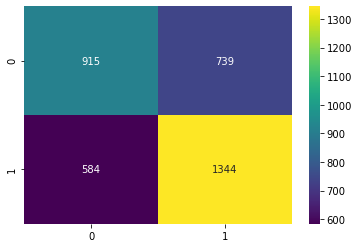

In [92]:
#Predicting test set
#we're going to have our grid_search predict the X_test.
#It's going to predict the X_test,it's going to run the accuracy,and it's going to create a model_results that is going to detail those accuracies.

predictions = grid_search.predict(X_test) #Rather than classifier, we will use grid_Search
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, predictions)
cm
sns.heatmap(cm, annot= True, cmap='viridis',annot_kws={"size": 10},fmt="d")

In [100]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1654
           1       0.65      0.70      0.67      1928

    accuracy                           0.63      3582
   macro avg       0.63      0.63      0.63      3582
weighted avg       0.63      0.63      0.63      3582



In [101]:
#Now doing the exact same but using Gini version
#Round 1: Gini

In [102]:
parameters= {'criterion':['gini'],'max_depth':[3,None],'max_features':[1,5,10],'min_samples_split':[2,5,10], 'min_samples_leaf':[1,5,10], 'bootstrap':[True, False]}

In [103]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(estimator= classifier, param_grid= parameters, scoring= "accuracy", cv=10, n_jobs=-1)

In [104]:
grid_search= grid_search.fit(X_train, y_train)

In [105]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

rf_best_accuracy, rf_best_parameters

(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [110]:
#Round 2: Gini
parameters= {'criterion':['gini'],'max_depth':[None],'max_features':[8,10,12],'min_samples_split':[2,3], 'min_samples_leaf':[3,5,7], 'bootstrap':[True]}

In [111]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(estimator= classifier, param_grid= parameters, scoring= "accuracy", cv=10, n_jobs=-1)

In [112]:
grid_search= grid_search.fit(X_train, y_train)

In [113]:
#The results 
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

rf_best_accuracy, rf_best_parameters

(0.6369569348984628,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 8,
  'min_samples_leaf': 7,
  'min_samples_split': 2})

In [ ]:
#Final Part here is-
#Apply the model to the test set to see the set of results improves the accuracy or not

<AxesSubplot:>

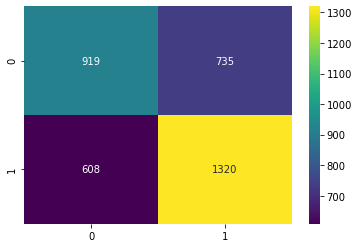

In [115]:
#Predicting test set
#we're going to have our grid_search predict the X_test.
#It's going to predict the X_test,it's going to run the accuracy,and it's going to create a model_results that is going to detail those accuracies.

predictions = grid_search.predict(X_test) #Rather than classifier, we will use grid_Search
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, predictions)
cm
sns.heatmap(cm, annot= True, cmap='viridis',annot_kws={"size": 10},fmt="d")

In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1654
           1       0.64      0.68      0.66      1928

    accuracy                           0.63      3582
   macro avg       0.62      0.62      0.62      3582
weighted avg       0.62      0.63      0.62      3582



In [ ]:
#the difference b/w entropy and gini are just due to randomness, but overall we are just going to stick with random forest entropy and realize that this is the best model that we can probably use!
#Just the best model over every other model

In [118]:
# Formatting Final Results

final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = predictions
final_results = final_results[['entry_id', 'e_signed', 'predictions']]


In [119]:
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,1
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,0
17888,8958068,0.0,0
17890,3605941,0.0,1
17901,1807355,0.0,1
